In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
tdt = pd.read_csv('C:\\Users\\Admin\\Desktop\\train.csv')
#tdt.head(10)

In [3]:
print('passenger in original data: '+ str(len(tdt.index)))

passenger in original data: 891


In [4]:
tdt.drop('Cabin', axis =1, inplace=True)

In [5]:
tdt.dropna(inplace=True)

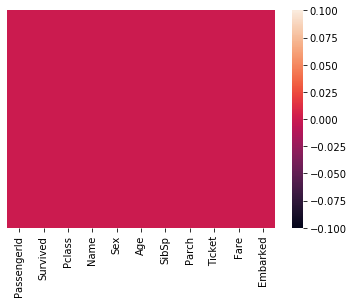

In [6]:
sns.heatmap(tdt.isnull(), yticklabels=False)

In [7]:
tdt.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [8]:
gender = pd.get_dummies(tdt['Sex'], drop_first=True)
gender.head()

,male
0,1
1,0
2,0
3,0
4,1


In [9]:
embark = pd.get_dummies(tdt['Embarked'], drop_first=True)
embark.head(5)

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [10]:
Pcl = pd.get_dummies(tdt['Pclass'], drop_first= True)
Pcl.head()
tdt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [11]:
tdt = pd.concat([tdt, gender, embark, Pcl], axis=1)

In [12]:
tdt.drop(['Sex', 'Embarked', 'PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)

In [13]:
tdt.drop(['Pclass', 'SibSp', 'Parch', 'Fare'], axis=1, inplace=True)
#tdt.head()

In [28]:
##Train my dataset
tdt.drop(['Q', 'S'], axis = 1, inplace= True)
tdt.head()

KeyError: "['Q' 'S'] not found in axis"

In [29]:
tdt.head()

,Survived,Age,male,2,3
0,0,22.0,1,0,1
1,1,38.0,0,0,0
2,1,26.0,0,0,1
3,1,35.0,0,0,0
4,0,35.0,1,0,1


In [30]:
x = tdt.drop('Survived', axis = 1)
y = tdt['Survived']

In [31]:
from sklearn.model_selection import train_test_split

In [32]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

In [22]:
#from sklearn.linear_model import LogisticRegression
#logmodel = LogisticRegression()
#logmodel.fit(x_train, y_train)

In [33]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()

In [34]:
model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [35]:
x_test[0:10]

,Age,male,2,3
290,26.0,0,0,0
310,24.0,0,0,0
636,32.0,1,0,1
850,4.0,1,0,1
437,24.0,0,1,0
845,42.0,1,0,1
86,16.0,1,0,1
691,4.0,0,0,1
2,26.0,0,0,1
607,27.0,1,0,0


In [36]:
pred_y = model.predict(x_test) 

In [42]:
y_test[0:10]

290    1
310    1
636    0
850    0
437    1
845    0
86     0
691    1
2      1
607    1
Name: Survived, dtype: int64

In [43]:
pred_y[0:10]

array([1, 1, 0, 0, 1, 0, 0, 1, 1, 0], dtype=int64)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, pred_y)

0.8037383177570093

In [44]:
model.predict_proba(x_test[0:10])

array([[0.09211659, 0.90788341],
       [0.09027274, 0.90972726],
       [0.94104348, 0.05895652],
       [0.9131896 , 0.0868104 ],
       [0.04224804, 0.95775196],
       [0.94357923, 0.05642077],
       [0.92979796, 0.07020204],
       [0.25911551, 0.74088449],
       [0.33460581, 0.66539419],
       [0.75510807, 0.24489193]])

In [47]:
X_set, y_set =  x_train, y_train

X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1,step =  0.01  ),
                    np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1,step =  0.01  ))
plt.contourf(X1, X2, model.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
            alpha = 0.75, cmap = ListedColormap(('red', 'green')))

plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j,0], X_set[y_set == j, 1],
               c = ListedColormap(('red', 'green'))(i), label =j)
    
plt.title("Logistic Regression(Training set)")
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()
plt.show()

TypeError: '(slice(None, None, None), 0)' is an invalid key